In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.utils import shuffle

### Loading data

In [2]:
filename = '../../Dataset/heartbeatFeaturesA4.csv'
df = pd.read_csv(filename)

# Remove the extra column read

toremove = df.shape[1] -1 
df = df.iloc[:, 0:toremove]
df.head()

,stdPCA1,stdPCA2,stdPCA3,meanPCA1,meanPCA2,meanPCA3,meanS1,meanS2,stdS1,stdS2,...,minstdS1,maxstdS1,mmstdS1,minstdS2,maxstdS2,mmstdS2,posRatio,stdWavelet,meanWavelet,class
0,2.443969,1.956057,1.419750,-1.130227e-16,2.300462e-17,-3.150633e-17,630.9091,775.6364,27.21196,84.00985,...,23.28590,23.73020,19.31608,62.78225,79.19042,56.28153,0.260870,0.063271,0.006662,Normal
1,3.258185,1.120398,0.830715,-1.528407e-16,-4.200344e-17,5.618962e-17,2118.5000,2387.6670,258.09400,781.68690,...,258.09400,258.09400,258.09400,943.28040,27.57716,781.68690,0.666667,0.210681,0.006673,Normal
2,2.647761,1.797890,1.190613,-1.489627e-16,8.707632e-18,-5.675510e-18,1584.6670,1601.0000,445.91960,193.08370,...,511.94530,62.93250,445.91960,210.90600,50.29248,55.15433,0.250000,0.122422,-0.003863,Normal
3,2.767485,1.699618,1.107745,7.495414e-17,-2.916449e-17,-3.437746e-17,500.1667,687.0000,41.92381,37.17257,...,38.70518,38.58568,35.38503,34.71087,31.92091,29.30491,0.583333,0.516152,0.039785,Normal
4,2.381787,1.941468,1.482395,2.343804e-17,3.225815e-17,-4.268191e-17,601.9000,928.0909,46.01075,37.85883,...,37.46925,46.21087,37.83965,36.80957,31.54697,30.47039,0.000000,0.040477,0.001033,Normal


# Some stats

In [3]:
df.shape

(124, 27)

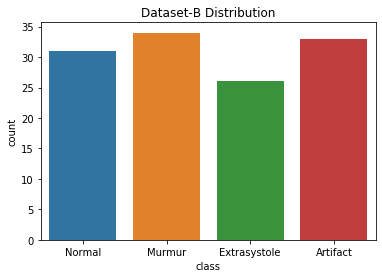

In [4]:
plot = sns.countplot(x='class', data=df).set_title('Dataset-B Distribution').get_figure()

### Column Selections - Inputs and Labels

In [5]:
# Only take this select set of features from the Dataset A

X = df.iloc[:,0:17]
X[['maxstdS1', 'maxstdS2', 'mmstdS1', 'mmstdS2']] = df[['maxstdS1', 'maxstdS2','mmstdS1', 'mmstdS2']]

# Normalise the features

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
x_dim = X.shape[1]

# Give the columns back their names....

X.columns = [ 'stdPCA1', 'stdPCA2', 'stdPCA3', 'meanPCA1', 
               'meanPCA2', 'meanPCA3', 'meanS1', 'meanS2', 
          'stdS1', 'stdS2','rebuilError', 'ratios','stdFFTSHA' ,
          'lenFFTSHA', 'stdlenFFTSHA' ,'lenstdFFTSHA' ,'posFFT',
         'maxstdS1', 'maxstdS2', 'mmstdS1', 'mmstdS2']
X.head()

,stdPCA1,stdPCA2,stdPCA3,meanPCA1,meanPCA2,meanPCA3,meanS1,meanS2,stdS1,stdS2,...,ratios,stdFFTSHA,lenFFTSHA,stdlenFFTSHA,lenstdFFTSHA,posFFT,maxstdS1,maxstdS2,mmstdS1,mmstdS2
0,0.319128,0.725107,0.834288,0.525408,0.563569,0.483254,0.136398,0.030223,0.013630,0.008166,...,0.471032,0.149668,0.200000,0.099185,0.011421,0.416667,0.016788,0.007698,0.013665,0.005471
1,0.930489,0.080488,0.288644,0.511140,0.508514,0.600222,0.693966,0.126579,0.129271,0.075983,...,0.553571,0.175355,0.222222,0.101356,0.010620,0.375000,0.182591,0.002681,0.182591,0.075983
2,0.472147,0.603098,0.622030,0.512529,0.551461,0.517707,0.493878,0.079558,0.223347,0.018768,...,0.531235,0.096125,0.333333,0.080668,0.032069,0.125000,0.044522,0.004889,0.315471,0.005361
3,0.562043,0.527292,0.545267,0.592769,0.519388,0.479424,0.087394,0.024925,0.020998,0.003613,...,0.720608,0.111594,0.233333,0.087953,0.018741,0.250000,0.027298,0.003103,0.025034,0.002849
4,0.272438,0.713853,0.892318,0.574308,0.571406,0.468348,0.125525,0.039336,0.023045,0.003680,...,0.339286,0.562892,0.033333,0.784206,0.000460,0.500000,0.032692,0.003066,0.026770,0.002962


In [6]:
# For testing later on ....at In[25]

np.set_printoptions(suppress=True)
P = X.values[1:10,:]

In [7]:
# Get the classes

Y = df.iloc[:,toremove-1:toremove]
Y.head()

,class
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal


In [8]:
# Condition the classes for Training

encoder = preprocessing.LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
print(Y)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Data Split - Training and Testing Sets

In [9]:
s_rand_state = 'NULL'

# X,Y = shuffle(X,Y,random_state=s_rand_state)

In [10]:
tt_rand_state = 0

X_train,X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = tt_rand_state)

## Frequency Distribution of classes

In [11]:
train_outcome = pd.crosstab(index = Y_train, columns = "count")
test_outcome = pd.crosstab(index = Y_test, columns = "count")

print('Train distribution: ','\n',train_outcome,'\n\n\t\n\n','Test distribution: ','\n',test_outcome)

Train distribution:  
 col_0  count
row_0       
0         27
1         22
2         26
3         24 

	

 Test distribution:  
 col_0  count
row_0       
0          6
1          4
2          8
3          7


In [12]:
# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")


Dimension of Train set (99, 21)
Dimension of Test set (25, 21) 



In [13]:
# Total Number of Continous and Categorical features in the training set

num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 21


## Parameter Tuning

In [14]:
# Hyperparameter tuning using grid search and cross validation

params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

## Training SVM model using radial kernel

In [15]:
svm_model = GridSearchCV(SVC(probability=True), params_grid, cv = 5)
#svm_model = SVC()
#train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel = 'linear'),X_train, Y_train, cv = 5)
svm_model.fit(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
# View the accuracy score
#print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")


Best C: 10 

Best Kernel: linear 

Best Gamma: auto_deprecated 



In [17]:
# Build the final model

final_model = svm_model.best_estimator_

## Plots

In [18]:
# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# plt.plot(train_scores, label='Training Accuracy')
# plt.plot(valid_scores, label='Validation Accuracy')
# plt.legend(loc='upper right')
# plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
# plt.title('Training and Validation Accuracy')

## Confusion Matrix and Accuracy score

In [19]:
# Get the predicted scores
#encoder = preprocessing.LabelEncoder()

Y_pred = final_model.predict(X_test)
#Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [20]:
print(accuracy_score(Y_test,Y_pred))

0.64


In [21]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(Y_test,Y_pred))
print("\n")
print(classification_report(Y_test,Y_pred))

Training_score = final_model.score(X_train , Y_train)
Testing_score  = final_model.score(X_test  , Y_test )

print("Training set score for SVM: %f" % Training_score)
print("Testing  set score for SVM: %f" % Testing_score)

svm_model.score

[[4 2 0 0]
 [3 1 0 0]
 [0 0 7 1]
 [0 1 2 4]]


              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.25      0.25      0.25         4
           2       0.78      0.88      0.82         8
           3       0.80      0.57      0.67         7

    accuracy                           0.64        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.65      0.64      0.64        25

Training set score for SVM: 0.787879
Testing  set score for SVM: 0.640000


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

In [22]:
# Loggin runs....

with open('./Logs/A_SVM_stats.log', 'a+') as f:
            f.write('\n==============================================================\n' + filename  +'\n\n' + 'Shuffle rand state: '+ str(s_rand_state)+'\n'+ 'Test Train rand state : '+ str(tt_rand_state) +'\n\n'+ str(confusion_matrix(Y_test,Y_pred)) +'\n\n' + 'Dimensions: ' + str(x_dim) + '\n'+ 'Testing Accuracy: ' + str(final_model.score(X_test  , Y_test )) + ' Training Acc: ' + str(final_model.score(X_train , Y_train)) + '\nTesting Score: '+ str(accuracy_score(Y_test,Y_pred)) + '\n\n' + classification_report(Y_test,Y_pred))

## Saving The Model


In [23]:
import pickle

In [24]:
trs = str(int(Training_score*100))
tss = str(int(Testing_score*100))

In [25]:
model_name_ = '../../Models/A_SVM_tss_' + tss + '_trs_' + trs
print(model_name_)

../../Models/A_SVM_tss_64_trs_78


In [26]:
model = open(model_name_ + '.pkl', "wb")
pickle.dump(svm_model,model)
model_pkl = open(model_name_ + '.pkl', "rb")
model_test = pickle.load(model_pkl)

In [27]:
model_test.predict_proba(P)

array([[0.05121309, 0.20620764, 0.36784091, 0.37473837],
       [0.02486628, 0.38163373, 0.17532868, 0.41817131],
       [0.12148899, 0.17553211, 0.37133555, 0.33164334],
       [0.12381745, 0.33914928, 0.13948614, 0.39754713],
       [0.04119851, 0.36222928, 0.16607976, 0.43049244],
       [0.07991038, 0.35517625, 0.09240797, 0.4725054 ],
       [0.06279545, 0.24542579, 0.35021543, 0.34156334],
       [0.22830459, 0.11552385, 0.43441621, 0.22175534],
       [0.02026197, 0.42160465, 0.04730789, 0.51082548]])

In [28]:
model_test.predict(P)

array([3, 3, 3, 3, 1, 3, 3, 2, 1])